In [1]:
# 📦 Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# 🗂️ Step 2: Dataset & Label Setup
data_dir = "balanced_dataset"     # Path to your dataset
img_size = (64, 64)               # Resize for faster processing

label_map = {
    "Real": 0,
    "Altered-Easy": 1,
    "Altered-Medium": 2,
    "Altered-Hard": 3
}

labels_str = ['Real', 'Altered-Easy', 'Altered-Medium', 'Altered-Hard']
colors = ['green', 'blue', 'orange', 'red']


In [3]:
# 🖼️ Step 3: Load and Preprocess Images

X = []
y = []

for label_name, label_idx in label_map.items():
    folder = os.path.join(data_dir, label_name)
    for file in os.listdir(folder):
        if file.lower().endswith(".bmp"):
            img_path = os.path.join(folder, file)
            
            # Load image in grayscale, resize, flatten
            img = Image.open(img_path).convert("L")
            img = img.resize(img_size)
            img_array = np.array(img).flatten()
            
            X.append(img_array)
            y.append(label_idx)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"✅ Loaded {X.shape[0]} images. Each image size: {img_size}, flattened to {X.shape[1]} features.")


✅ Loaded 24000 images. Each image size: (64, 64), flattened to 4096 features.


In [4]:
# ⚖️ Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# 📊 Step 5: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"🧪 Explained Variance Ratio: {pca.explained_variance_ratio_}")


🧪 Explained Variance Ratio: [0.15441438 0.09796366]


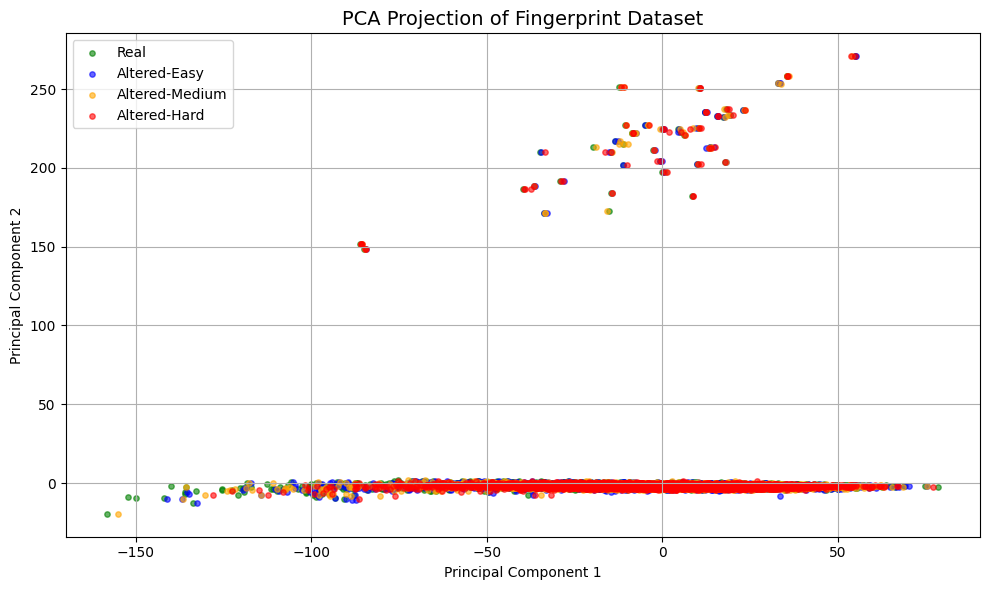

In [6]:
# 📈 Step 6: Visualize PCA Result

plt.figure(figsize=(10, 6))

for i in range(4):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=labels_str[i],
        alpha=0.6,
        s=15,
        c=colors[i]
    )

plt.title("PCA Projection of Fingerprint Dataset", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# ⚠️ Step: Filter out outliers on PCA Component 2 (Y-axis)

# Set threshold (tune as needed)
y_threshold = 100

# Create a mask for points below threshold
mask = np.abs(X_pca[:, 1]) < y_threshold

# Filter PCA output and labels
X_pca_filtered = X_pca[mask]
y_filtered = y[mask]

print(f"Removed {len(X_pca) - len(X_pca_filtered)} outlier points.")


Removed 200 outlier points.


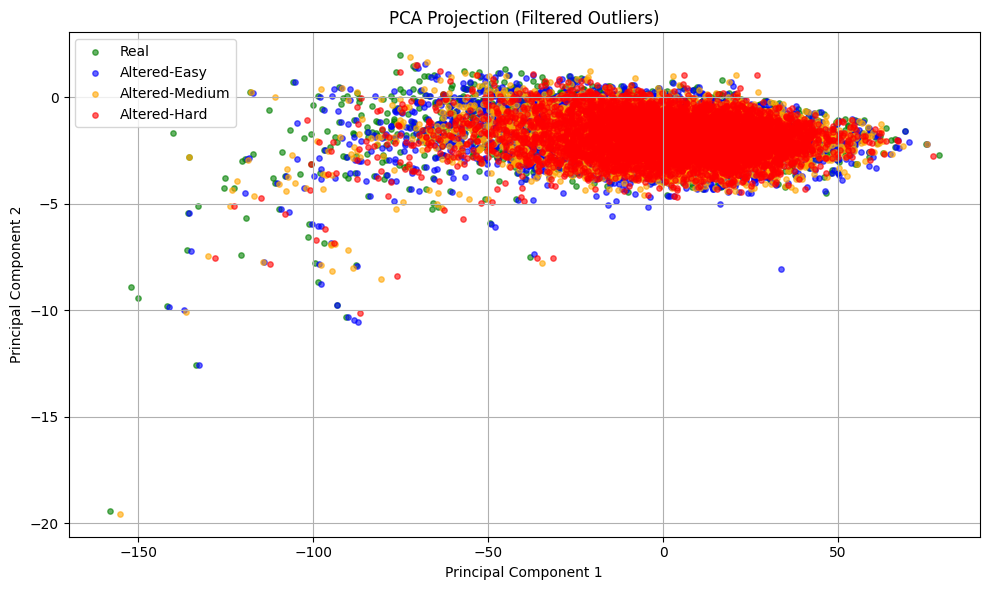

In [8]:
# 📈 Re-plot filtered PCA data

plt.figure(figsize=(10, 6))

for i in range(4):
    plt.scatter(
        X_pca_filtered[y_filtered == i, 0],
        X_pca_filtered[y_filtered == i, 1],
        label=labels_str[i],
        alpha=0.6,
        s=15,
        c=colors[i]
    )

plt.title("PCA Projection (Filtered Outliers)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
